# BL40A2010 Introduction to IoT-Based Systems

## Tutorial 4: *Reflexive-active systems*

## Author: Pedro Nardelli

In [1]:
#Import libraries
import networkx as nx
import matplotlib.pyplot as plt 
import scipy as sp
import numpy as np
from IPython.lib.display import YouTubeVideo

### Cellular automaton

From [Wikipedia](https://en.wikipedia.org/wiki/Cellular_automaton): *A cellular automaton consists of a regular grid of cells, each in one of a finite number of states, such as on and off (in contrast to a coupled map lattice). The grid can be in any finite number of dimensions. **For each cell, a set of cells called its neighborhood is defined relative to the specified cell.** An initial state (time t = 0) is selected by assigning a state for each cell. **A new generation is created (advancing t by 1), according to some fixed rule (generally, a mathematical function) that determines the new state of each cell in terms of the current state of the cell and the states of the cells in its neighborhood.** Typically, the rule for updating the state of cells is the same for each cell and does not change over time, and is applied to the whole grid simultaneously, though exceptions are known, such as the stochastic cellular automaton and asynchronous cellular automaton.*

![](https://upload.wikimedia.org/wikipedia/commons/e/e5/Gospers_glider_gun.gif)

### Elementary cellular automaton

*The simplest nontrivial cellular automaton would be **one-dimensional, with two possible states per cell, and a cell's neighbors defined as the adjacent cells on either side of it**. A cell and its two neighbors form a neighborhood of 3 cells, so there are 23 = 8 possible patterns for a neighborhood. **A rule consists of deciding, for each pattern, whether the cell will be a 1 or a 0 in the next generation**. There are then 28 = 256 possible rules. These 256 cellular automata are generally referred to by their Wolfram code, a standard naming convention invented by Wolfram that gives each rule a number from 0 to 255. A number of papers have analyzed and compared these 256 cellular automata. The rule 30 and rule 110 cellular automata are particularly interesting.*

Stephen Wolfram studied in detail this class of automata, even using this as an example of the [A New Kind of Science](http://www.wolframscience.com/nks/): a book with more than 1000 pages!

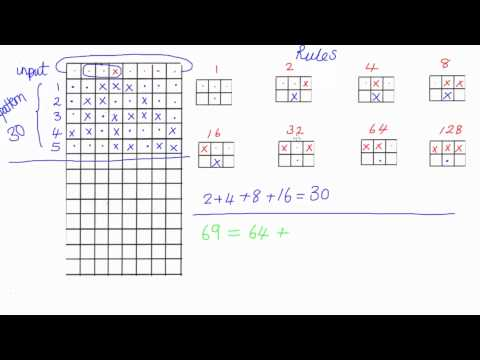

In [2]:
#More about Elementary cellular automaton
YouTubeVideo('M_pkidxeGMY')

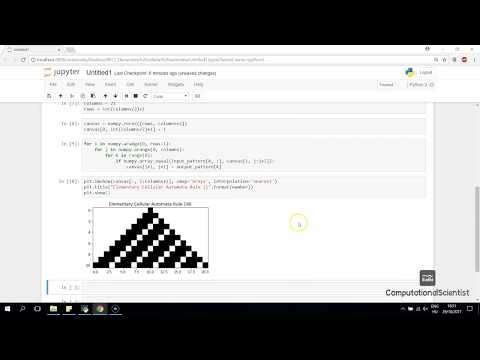

In [3]:
#This tutorial was based on the code developed in the following video
YouTubeVideo('vhHuHXY04no')

### Elementary cellular automaton implemented

In [2]:
#Input table
input_pattern = np.zeros([8,3])
for i in range(8):
    input_pattern[i,:] = [int(x) for x in np.binary_repr(7-i, width=3)]
input_pattern

array([[1., 1., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [16]:
#Choosing the rule
number = 111

In [17]:
#Output table
output_pattern = [int(x) for x in np.binary_repr(number, width=8)]
output_pattern

[0, 1, 1, 0, 1, 1, 1, 1]

In [18]:
#Number of columns and rows (for visualization)
columns = 100
rows = int(columns/2)+1

In [19]:
#Initial state
canvas = np.zeros([rows, columns+2])
#Single cell in the middle
#canvas[0,int(columns/2+1)+1]=1
###
#Random state
canvas [0] = np.random.randint(2, size=columns+2)

In [20]:
for i in np.arange(0, rows-1):
    for j in np.arange(0,columns):
        for k in range(8):
            if np.array_equal(input_pattern[k,:],canvas[i,j:j+3]):
                canvas[i+1,j+1] = output_pattern[k]

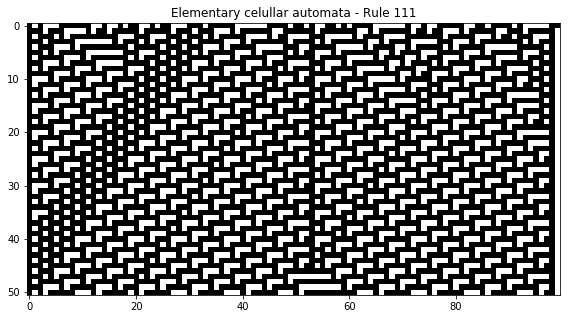

In [21]:
plt.figure(figsize=(14,5)) 
plt.imshow(canvas[:, 1:columns+1], cmap='Greys',interpolation='nearest')
plt.title("Elementary celullar automata - Rule {}".format(number))
plt.show()

### Structure of awareness

Node $X_i$ has two neighbors $X_{i-1}$ and $X_{i+1}$ so that it knows the information about their actual state at time $t$. To make a decision about its state in the next time $t+1$, $X_i$ needs the states of itseld and its neighbors. So it need to have the following reflection: $X_{i-1}x_i + X_{i}x_i + X_{i+1}x_i = (X_{i-1} + X_{i} + X_{i+1})x_i$. 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


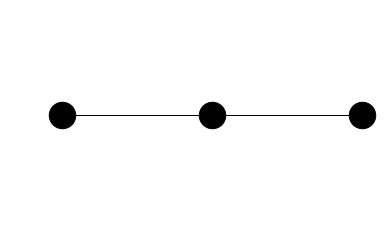

In [22]:
#As a graph
G= nx.cycle_graph(3)
G.remove_edge(0,2)
G.node[0]['pos'] = (-3,0)
G.node[1]['pos'] = (0,0)
G.node[2]['pos'] = (3,0)
node_pos = nx.get_node_attributes(G,'pos')
nx.draw_networkx(G, node_pos, node_color='black', font_color='white', edge_color='black', font_weight='bold',  
                 with_labels=False, node_size=700)
# Remove the axis
plt.axis('off')
plt.show()

### Three-layer model

Let's consider that each node can control an on/off switch. Thei decided on or off following the rules of the cellular automaton. The system requires that the activity ratio is no more than 60%: i.e. no more than 60% of the elements are active at a given time-slot. Besides the system shall be designed to be efficient (working close to the limit) and fair (the elements are on or off with around 50% of the time).

Is it possible? If yes, which rule should we use considering a random initial state? 

*Hint:* Let us refer to the outcomes from different rules with random initial conditions available at the sub-item **Random initial state** from Wikipedia entry **[Elementary cellular automaton](https://en.wikipedia.org/wiki/Elementary_cellular_automaton)** or in [here](http://mathworld.wolfram.com/ElementaryCellularAutomaton.html) with only one element active in the middle.

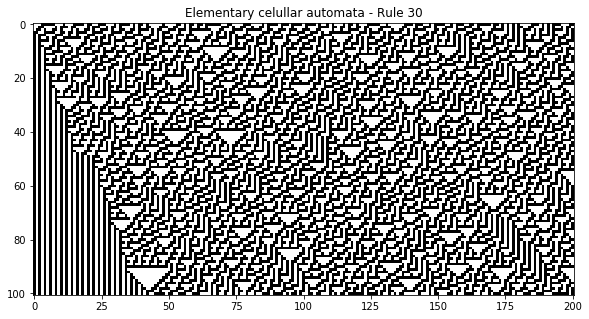

In [26]:
#Choosing the rule
number = 30
output_pattern = [int(x) for x in np.binary_repr(number, width=8)]
#Number of elements
columns = 201
rows = int(columns/2)+1
#Initial state
canvas = np.zeros([rows, columns+2])
active = np.zeros(rows)
#Random state
canvas [0] = np.random.randint(2, size=columns+2)
#Running the system
for i in np.arange(0, rows-1):
    active[i] = sum(canvas[i,1:columns+1])/columns
    for j in np.arange(0,columns):
        for k in range(8):
            if np.array_equal(input_pattern[k,:],canvas[i,j:j+3]):
                canvas[i+1,j+1] = output_pattern[k]

plt.figure(figsize=(14,5))                 
plt.imshow(canvas[:, 1:columns+1], cmap='Greys',interpolation='nearest')
plt.title("Elementary celullar automata - Rule {}".format(number))
plt.show()

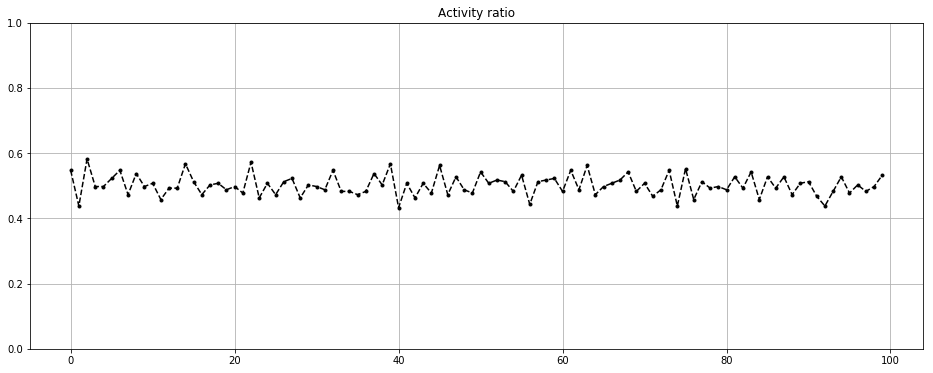

In [27]:
#Usage efficiency - activity ratio per time
plt.figure(figsize=(16,6)) 
plt.plot(active[0:rows-1],color='black', marker='.',linestyle='--') 
plt.title("Activity ratio")
plt.ylim([0, 1])
plt.grid(True) #grid
plt.show() 

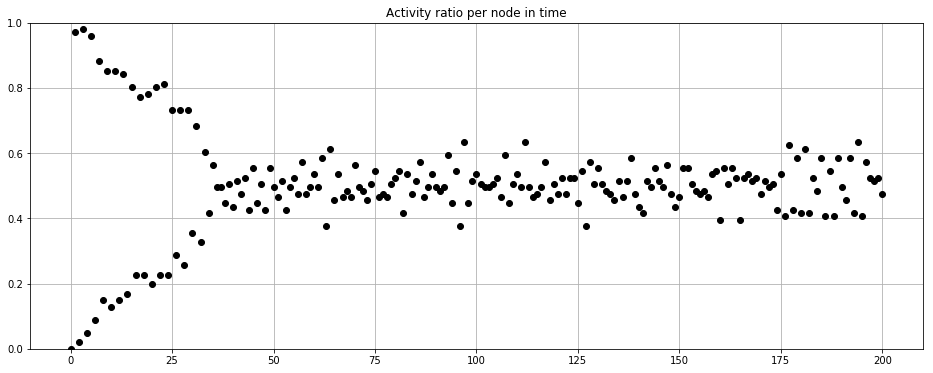

In [28]:
#Fairness - activity ratio per node over time
aux = np.zeros(columns)
for i in np.arange(0,columns):
    aux[i] = sum(canvas[:,i])

plt.figure(figsize=(16,6)) 
plt.plot(aux/rows,color='black', marker='o',linestyle='') 
plt.title("Activity ratio per node in time")
plt.ylim([0, 1])
plt.grid(True) #grid
plt.show() 

### If an attacker could introduce disinformation in the link of only one random node, let me say node 50 telling that its neighbor node 51 is always OFF regardless of it actual state, how this would change the system dynamics considering that this disinformation is included from $t=40$?

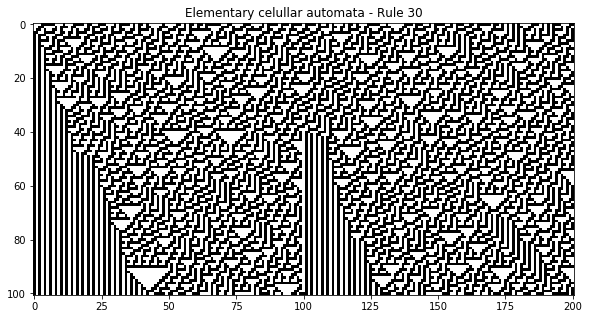

In [29]:
#Including an attack time
attack_time = 40
#Which node is to be attacked
attaked_node = 100
#Aux array
fake_state = np.zeros(3)

#Running the system
for i in np.arange(0, attack_time-1):
    active[i] = sum(canvas[i,1:columns+1])/columns
    for j in np.arange(0,columns):
        for k in range(8):
            if np.array_equal(input_pattern[k,:],canvas[i,j:j+3]):
                canvas[i+1,j+1] = output_pattern[k]

#Including an attacker.
for i in np.arange(attack_time, rows-1):
    active[i] = sum(canvas[i,1:columns+1])/columns
    for j in np.arange(0,columns):
        for k in range(8):
            if j+1 == attaked_node:
                canvas_fake=canvas[i,j:j+3]
                canvas_fake[2]=0
                if np.array_equal(input_pattern[k,:],canvas_fake):
                    canvas[i+1,j+1] = output_pattern[k]
            else:
                if np.array_equal(input_pattern[k,:],canvas[i,j:j+3]):
                    canvas[i+1,j+1] = output_pattern[k]
              
                
plt.figure(figsize=(14,5))                 
plt.imshow(canvas[:, 1:columns+1], cmap='Greys',interpolation='nearest')
plt.title("Elementary celullar automata - Rule {}".format(number))
plt.show()

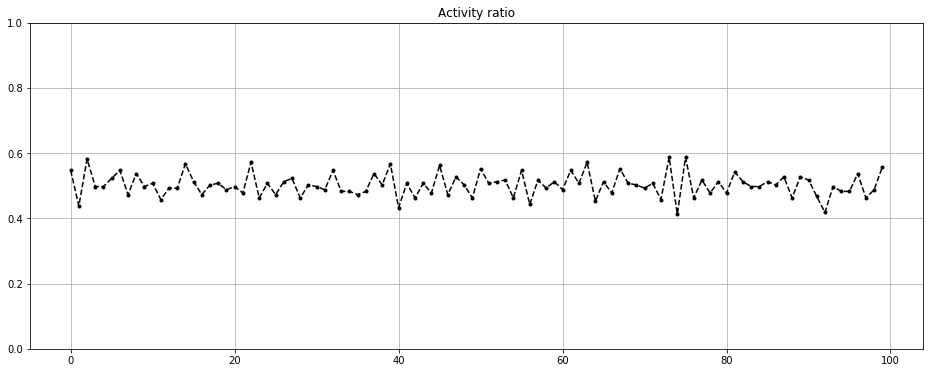

In [30]:
plt.figure(figsize=(16,6)) 
plt.plot(active[0:rows-1],color='black', marker='.',linestyle='--') 
plt.title("Activity ratio")
plt.ylim([0, 1])
plt.grid(True) #grid
plt.show() 

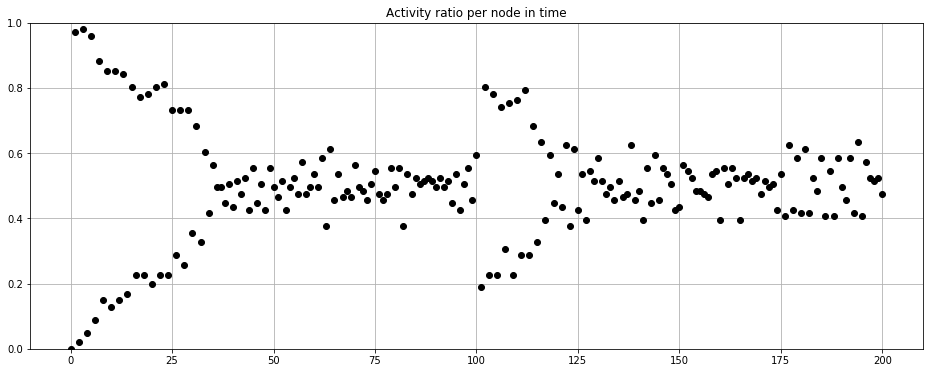

In [31]:
aux = np.zeros(columns)
for i in np.arange(0,columns):
    aux[i] = sum(canvas[:,i])

plt.figure(figsize=(16,6)) 
plt.plot(aux/rows,color='black', marker='o',linestyle='') 
plt.title("Activity ratio per node in time")
plt.ylim([0, 1])
plt.grid(True) #grid
plt.show() 

By doing so we showed that the attack can effect the system's dynamics. 

### How could more realistic systems be modelled in this way? What are the effects of the communication network topology? And the decision rules? And the physical system constraints?